In [ ]:
!pip3 install torch torchnlp torchvision

     |████████████████████████████████| 53 kB 778 kB/s 
     |████████████████████████████████| 45 kB 2.0 MB/s 
     |████████████████████████████████| 5.4 MB 15.6 MB/s 
     |████████████████████████████████| 591.8 MB 618 bytes/s 
     |████████████████████████████████| 22.1 MB 1.6 MB/s 
     |████████████████████████████████| 17.4 MB 116 kB/s 
     |████████████████████████████████| 17.3 MB 24 kB/s 
     |████████████████████████████████| 12.8 MB 34.4 MB/s 
     |████████████████████████████████| 12.7 MB 55 kB/s 
     |████████████████████████████████| 11.8 MB 257 kB/s 
     |████████████████████████████████| 5.9 MB 26.8 MB/s 
     |████████████████████████████████| 6.6 MB 28.7 MB/s 
     |████████████████████████████████| 6.6 MB 39.9 MB/s 
     |████████████████████████████████| 4.0 MB 28.2 MB/s 
     |████████████████████████████████| 10.2 MB 18.2 MB/s 
     |████████████████████████████████| 10.1 MB 34.2 MB/s 
     |████████████████████████████████| 8.8 MB 29.9 MB/s 
     |███████

In [ ]:
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow_hub as hub

In [ ]:
data = [["not sure", "no"],
        ["I may agree", "no"],
        ["I don't know", "no"],
        ["I have no clue", "no"],
        ["I think so", "no"],
        ["I agree", "no"],
        ["I'm not sure if I agree", "no"],
        ["I may agree", "no"],
        ["I might agree", "no"],
        ["I'm not sure", "no"],
        ["I don't have a clue", "no"],
        ["I don't have a clue", "no"],
        ["I have no clue", "no"],
        ["I have no idea", "no"],
        ["No idea", "no"],
        ["dunno", "no"],
        ["I've changed my mind", "no"],
        ["I don't agree", "no"],
        ["I do not agree", "no"],
        ["Absolutely not", "no"],
        ["belay that", "no"],
        ["cut it out", "no"],
        ["don't do anything", "no"],
        ["don't do it", "no"],
        ["forget it", "no"],
        ["forget about it", "no"],
        ["never mind", "no"],
        ["no thanks", "no"],
        ["no thank you", "no"],
        ["no way", "no"],
        ["on second thought, don't do it", "no"],
        ["please don't", "no"],
        ["scratch that", "no"],
        ["cancel", "no"],
        ["denied", "no"],
        ["disconnect", "no"],
        ["disengage", "no"],
        ["don't", "no"],
        ["end", "no"],
        ["exit", "no"],
        ["halt", "no"],
        ["n", "no"],
        ["q", "no"],
        ["nah", "no"],
        ["nay", "no"],
        ["neg", "no"],
        ["negative", "no"],
        ["negatory", "no"],
        ["nein", "no"],
        ["nevermind", "no"],
        ["no", "no"],
        ["no", "no"],
        ["nope", "no"],
        ["nope", "no"],
        ["nyet", "no"],
        ["skip", "no"],
        ["stop", "no"],
        ["stop", "no"],
        ["quit", "no"],
        ["quit", "no"],
        ["quit", "no"],
["Not now.", "no"],
["Look! Squirrel!", "no"],
["No thanks, I won’t be able to make it.", "no"],
["Not this time.", "no"],
["Heck no.", "no"],
["No way, Jose.", "no"],
["Regrettably, I'm not able to.", "no"],
["It's that time of the year when I must say no.", "no"],
["It's a Wednesday. I have a No on Wednesday policy.", "no"],
["Ask me in a year.", "no"],
["I know someone that might be a fit for that. I'll email you their information.", "no"],
["You're so kind to think of me, but I can't.", "no"],
["Sounds great, but I can’t commit.", "no"],
["Rats! Would’ve loved to.", "no"],
["I’m slammed.", "no"],
["Perhaps next season when things clear up.", "no"],
["I’m at the end of my rope right now so have to take a raincheck.", "no"],
["If only it worked.", "no"],
["I’ll need to bow out.", "no"],
["I’m going to have to exert my NO muscle on this one.", "no"],
["I’m taking some time.", "no"],
["I’m in a season of NO.", "no"],
["I’m not the girl for you on this one.", "no"],
["I’m learning to limit my commitments.", "no"],
["I’m not taking on new things.", "no"],
["Another time might work.", "no"],
["It doesn’t sound like the right fit.", "no"],
["No thank you, but it sounds lovely.", "no"],
["It sounds like you’re looking for something I’m not able to give right now.", "no"],
["I believe I wouldn’t fit the bill, sorry.", "no"],
["It’s not a good idea for me.", "no"],
["I’m trying to cut back.", "no"],
["I won’t be able to help.", "no"],
["If only I had a clone!", "no"],
["I’m not able to set aside the time needed.", "no"],
["I won’t be able to dedicate the time I need to it.", "no"],
["I’m head-down right now on a project, so won’t be able to.", "no"],
["I wish there were two of me!", "no"],
["I’m honored, but can’t.", "no"],
["NoNoNoNoNoNo.", "no"],
["I’m booked into something else.", "no"],
["I’m not able to make that time.", "no"],
["Thanks, but no thanks.", "no"],
["I’m not able to make it this week/month/year.", "no"],
["Bye now.", "no"],
["I’ve got too much on my plate right now.", "no"],
["I’m not taking on anything else right now.", "no"],
["Bandwidth is low, so I won’t be able to make it work.", "no"],
["I wish I could make it work.", "no"],
["Not possible.", "no"],
["I wish I were able to.", "no"],
["If only I could!", "no"],
["I’d love to — but can’t.", "no"],
["Darn! Not able to fit it in.", "no"],
["No thanks, I have another commitment.", "no"],
["Unfortunately, it’s not a good time.", "no"],
["Sadly I have something else.", "no"],
["Unfortunately not.", "no"],
["I have something else. Sorry.", "no"],
["Apologies, but I can’t make it.", "no"],
["Thank you so much for asking. Can you keep me on your list for next year?", "no"],
        
        ["I think so", "yes"],
        ["I agree", "yes"],
        ["I agree", "yes"],
        ["I agree", "yes"],
        ["I'm sure", "yes"],
        ["I'm sure", "yes"],
        ["aye aye", "yes"],
        ["aye", "yes"],
        ["carry on", "yes"],
        ["do it", "yes"],
        ["do it", "yes"],
        ["get on with it then", "yes"],
        ["go ahead", "yes"],
        ["i agree", "yes"],
        ["make it happen", "yes"],
        ["make it so", "yes"],
        ["most assuredly", "yes"],
        ["perfect, thanks", "yes"],
        ["please do", "yes"],
        ["rock on", "yes"],
        ["that's correct", "yes"],
        ["that's right", "yes"],
        ["uh huh", "yes"],
        ["yeah, do it", "yes"],
        ["yes, do it", "yes"],
        ["yes, please", "yes"],
        ["you got it", "yes"],
        ["absolutely", "yes"],
        ["yes, absolutely", "yes"],
        ["affirmative", "yes"],
        ["alright", "yes"],
        ["aye", "yes"],
        ["certainly", "yes"],
        ["confirmed", "yes"],
        ["continue", "yes"],
        ["correct", "yes"],
        ["da", "yes"],
        ["good", "yes"],
        ["hooray", "yes"],
        ["ja", "yes"],
        ["ok", "yes"],
        ["ok", "yes"],
        ["okay", "yes"],
        ["proceed", "yes"],
        ["righto", "yes"],
        ["sure", "yes"],
        ["sure", "yes"],
        ["sure", "yes"],
        ["sure", "yes"],
        ["thanks", "yes"],
        ["totally", "yes"],
        ["true", "yes"],
        ["y", "yes"],
        ["ya", "yes"],
        ["ya", "yes"],
        ["yay", "yes"],
        ["yea", "yes"],
        ["yeah", "yes"],
        ["yeah", "yes"],
        ["yep", "yes"],
        ["yeppers", "yes"],
        ["yes", "yes"],
        ["yes", "yes"],
        ["yes", "yes"],
        ["k!", "yes"],
        ["Agreed", "yes"],
        ["All right", "yes"],
        ["By all means","yes"],
        ["Certainly","yes"],
        ["Consider it done","yes"],
        ["Definitely","yes"],
        ["Gladly","yes"],
        ['I’m on it',"yes"],  
        ["Of course","yes"],        
        ["Sounds good","yes"],
        ["Very well","yes"],
        ["Absolutely","yes"],
        ["Indubitably","yes"],
        ["Indeed","yes"],
        ["Undoubtedly","yes"],
        ["Affirmative","yes"],
        ["I’d be delighted","yes"],
        ["For sure","yes"],
        ["I’d love to","yes"], 
        ["No doubt","yes"],
        ["No problem","yes"],
        ["No worries","yes"],
        ["Roger","yes"],
        ["Roger that","yes"],
        ["Sounds like a plan","yes"], 
        ["Sounds good","yes"],
        ["Without a doubt","yes"],
        ["Yep","yes"],
        ["You bet","yes"],
        ["You got it","yes"],
        ["Okey dokey", "yes"],
        ["Okaley dokaley", "yes"],
        ["Yuppers","yes"],
        ["Totes","yes"],
        ["You betcha","yes"],
        ["Alrighty then","yes"],
        ["Aye aye, captain!","yes"],
        ["Yeah, sure.","yes"],
        ["Uh-huh…","yes"],
        ["Yeah…","yes"],
        ["Uh… ok…","yes"],   
        ["Yes!","yes"],
        ["Fine!","yes"],   
        ["OK!","yes"]
]

In [ ]:
df = pd.DataFrame(data,columns=['responses','sentiment'])
print(df.shape)
df

(231, 2)


,responses,sentiment
0,not sure,no
1,I may agree,no
2,I don't know,no
3,I have no clue,no
4,I think so,no
...,...,...
226,Yeah…,yes
227,Uh… ok…,yes
228,Yes!,yes
229,Fine!,yes


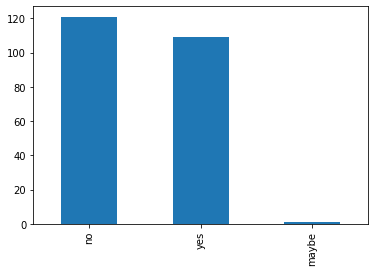

In [ ]:
df['sentiment'].value_counts().plot.bar()

In [ ]:
# Load Pretrained Word2Vec
#embed = hub.load("https://tfhub.dev/google/Wiki-words-250/2")
embed = hub.load("https://tfhub.dev/google/Wiki-words-500/2")

In [ ]:
def get_max_length(df):
    """
    get max token counts from train data, 
    so we use this number as fixed length input to RNN cell
    """
    max_length = 0
    for row in df['responses']:
        if len(row.split(" ")) > max_length:
            max_length = len(row.split(" "))
    return max_length
    

def get_word2vec_enc(responses):
    """
    get word2vec value for each word in sentence.
    concatenate word in numpy array, so we can use it as RNN input
    """
    encoded_reviews = []
    for response in responses:
        tokens = response.split(" ")
        word2vec_embedding = embed(tokens)
        encoded_reviews.append(word2vec_embedding)
    return encoded_reviews
        
def get_padded_encoded_reviews(encoded_reviews):
    """
    for short sentences, we prepend zero padding so all input to RNN has same length
    """
    padded_reviews_encoding = []
    for enc_review in encoded_reviews:
        zero_padding_cnt = max_length - enc_review.shape[0]
        pad = np.zeros((1, 500))
        for i in range(zero_padding_cnt):
            enc_review = np.concatenate((pad, enc_review), axis=0)
        padded_reviews_encoding.append(enc_review)
    return padded_reviews_encoding

def sentiment_encode(sentiment):
    """
    return one hot encoding for Y value
    """
    if sentiment == 'yes':
        return [1,0]
    else:
        return [0,1]
    
def preprocess(df):
    """
    encode text value to numeric value
    """
    # encode words into word2vec
    reviews = df['responses'].tolist()
    
    encoded_reviews = get_word2vec_enc(reviews)
    padded_encoded_reviews = get_padded_encoded_reviews(encoded_reviews)
    
    # encoded sentiment
    sentiments = df['sentiment'].tolist()
    encoded_sentiment = [sentiment_encode(sentiment) for sentiment in sentiments]
    X = np.array(padded_encoded_reviews)
    y = np.array(encoded_sentiment)
    return X, y

In [ ]:
# max_length is used for max sequence of input
max_length = get_max_length(df)

train_X, train_Y = preprocess(df)


In [ ]:
train_X.shape

(231, 16, 500)

In [ ]:
train_Y.dtype

dtype('int64')

In [ ]:
# LSTM model
model = Sequential()
model.add(LSTM(32))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
print('Train...')
model.fit(train_X, train_Y,epochs=150)

Train...
Epoch 1/150
8/8 [==============================] - 3s 18ms/step - loss: 0.6802 - accuracy: 0.5498
Epoch 2/150
8/8 [==============================] - 0s 15ms/step - loss: 0.6490 - accuracy: 0.5628
Epoch 3/150
8/8 [==============================] - 0s 18ms/step - loss: 0.6135 - accuracy: 0.6320
Epoch 4/150
8/8 [==============================] - 0s 15ms/step - loss: 0.5806 - accuracy: 0.6494
Epoch 5/150
8/8 [==============================] - 0s 15ms/step - loss: 0.5456 - accuracy: 0.7186
Epoch 6/150
8/8 [==============================] - 0s 16ms/step - loss: 0.5193 - accuracy: 0.7143
Epoch 7/150
8/8 [==============================] - 0s 15ms/step - loss: 0.5067 - accuracy: 0.7316
Epoch 8/150
8/8 [==============================] - 0s 18ms/step - loss: 0.4967 - accuracy: 0.7229
Epoch 9/150
8/8 [==============================] - 0s 17ms/step - loss: 0.4868 - accuracy: 0.7229
Epoch 10/150
8/8 [==============================] - 0s 19ms/step - loss: 0.4764 - accuracy: 0.7446
Epoch 11/1

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                68224     
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 68,290
Trainable params: 68,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test = [
         {'responses': 'Yess!!', 'sentiment': 'yes'},
         {'responses': 'Sure thing!', 'sentiment': 'yes'},
         {'responses': 'Naah', 'sentiment': 'no'},
         {'responses': 'Nay', 'sentiment': 'No'},
         {'responses': 'ummmm let me think about it', 'sentiment': 'no'},
         {'responses': 'I could but..', 'sentiment': 'no'}
    ]
test_df = pd.DataFrame(test)

test_X, test_Y = preprocess(test_df)

score, acc = model.evaluate(test_X, test_Y, verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

1/1 - 1s - loss: 0.9994 - accuracy: 0.6667
Test score: 0.999385416507721
Test accuracy: 0.6666666865348816


The above model uses the Keras Library which takes up a large amount of memeory space and the Test Accuracy is only at 66%.


As an alternate suggestion to using a large amount of memory space,the set of code below,uses a pre-trained sentiment analysis model from the transformers library hence doesn't take up addition memory space.

In [1]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 8.7 MB/s 
     |████████████████████████████████| 3.3 MB 43.6 MB/s 
     |████████████████████████████████| 636 kB 43.4 MB/s 
     |████████████████████████████████| 895 kB 40.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
# Importing the library
from transformers import pipeline

# Calling the pre trained sentiment-analysis model 
sentiment_analysis = pipeline("sentiment-analysis")

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [3]:
# Test data
pos_text = "Yeah would love to do this for you"
neg_text = "Hell no, I'm not talking to no damn bot"

In [4]:
# Test Results

result = sentiment_analysis(pos_text)[0]
print("Label:", result['label'])
print("Confidence Score:", result['score'])
print()

result = sentiment_analysis(neg_text)[0]
print("Label:", result['label'])
print("Confidence Score:", result['score'])

Label: POSITIVE
Confidence Score: 0.9996284246444702

Label: NEGATIVE
Confidence Score: 0.9990489482879639


Even though the confidence score is superb, it's important to note that the responses that have "F yeah" are categorized negative which is incorrect.

**Recommendation:** Try using the GloVe and FastText Libraries for this model to see if you are able to get better accuracy scores.